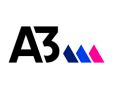 

<center><h1> Desafio Técnico A3Data </h1></center>

### 1. Introdução:

Esta análise tem o intuito de explorar a base de dados _"Ocorrências Aeronátuicas na Aviação Civil brasileira"_ com o intuito de construir premissas e hipóteses a serem validadas para direcionar possíveis sugestões e insights. A ideia inicial é entender as causas mais comuns que levam a uma ocorrência, assim como inferir se existem variáveis que influenciem nessas ocorrências.


Para isso foram disponibilizadas duas bases, uma sobre as ocorrências em questão e outra sobre as aeronaves que estavam envolvidas nessas ocorrências. Esses dados são abertos e disponibilizados pelo [Cenipa (Centro de Investigação e Prevenção de Acidentes Aeronáuticas)](https://www2.fab.mil.br/cenipa/index.php/o-cenipa) que é um  órgão do Comando da Aeronáutica responsável pelas atividades de investigação de acidentes aeronáuticos da aviação civil e da Força Aérea Brasileira.


Com o intuito de prevenir acidentes, esse órgão realiza diversos estudos e entre eles é interessante citar: a análise de acidentes ocorridos para prevenção futura e as análises de risco, a análise mais interessante é a de [risco de fauna](https://www2.fab.mil.br/cenipa/index.php/estatisticas/risco-da-fauna).


Após a contextualização necessária, o foco dessa análise exploratória são os dados de ocorrência e aeronave, caracterizados da seguinte forma:

##### Ocorrência:

- Principais variáveis qualitativas:

  - classificação: classificação da ocorrência dividida em: acidente ou incidente grave.
  - tipo: tipo de ocorrência, chegando a quase 50 tipos.
  - UF: estado da ocorrência.

- Principais variáveis quantitativas:

  - quantidade_recomendacoes: quantidade de recomendações de segurança enviadas.
  - aeronaves_envolvidas: quantidade de aeronaves envolvidas no acidente.
  - saida_pista: aeronave saiu ou não da pista de vôo.

##### Aeronave:

- Principais variáveis qualitativas:

  - equipamento: tipo da aeronave dividido em avião, helicóptero e outros(fabricante e modelo serão incluído caso necessário).
  - tipo_motor: tipo de motor da aeronave.
  - categoria_aviacao: categoria de aviação da aeronave no momento da ocorrência.
  - fase_operacao: fase de operação da aeronave no momento da ocorrência.
  - tipo_operacao: tipo de operação da aeronave no momento da ocorrência.
  - nivel_dano: nível de dano na aeronave após a ocorrência.
 

- Principais variáveis quantitativas:

  - quantidade_motores: quantidade de motores da aeronave.
  - peso_maximo_decolagem: peso máximo para decolagem.
  - quantidade_assentos: quantidade de assentos na aeronave.
  - ano_fabricacao: ano de fabricacao da aeronave.
  - quantidade_fatalidades: quantidade de fatalidades na aeronave.

Vale ressaltar que na documentação do banco de dados é citada uma tabela de fator contribuinte que não foi disponibilizada. Ao acessar o site do Cenipa não foi possível carregar a página Dados Abertos para adquirir a tabela, dessa forma, será necessário seguir sem a mesma.

### 2. Metodologia:

Para a análise destes dados, optou-se por seguir a seguinte metodologia:
- Visão geral dos dados para entender a origem e formas de utilização dos mesmos nas respectivas tabelas.
- Entendimento das principais variáveis iniciais relevantes.
- Tratamento das bases de dados para propiciar as análises.
- Análise descritiva geral dos dados para levantamento de hipóteses.
- Testar as hipóteses levantadas validando se possuem significância ou não.
- Conclusões sobre as hipóteses levantadas e insights para próximos passos.

### 3. Análise Exploratória de Dados:

#### 3.1. Tratamento de dados:

Neste primeiro momento será realizado os imports necessários, assim como o carregamento das bases de dados. O tamanho da base, existência de nulos, a média, o desvio padrão, os quartis, máximos e mínimos são relevantes para esta etapa.

In [1]:
#Básicos
import numpy as np 
import pandas as pd
import nbconvert

#visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
#Carregamento dos dados

aeronave = pd.read_csv('./aeronave.csv')
ocorrencia = pd.read_csv('./ocorrencia.csv')

In [5]:
aeronave.head()

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,NaN,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,NaN,2016-07-30


In [6]:
ocorrencia.head()

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,NaN,NaN,0,1,NaN,2016-07-30


In [7]:
aeronave.describe()

,codigo_aeronave,codigo_ocorrencia,codigo_operador,quantidade_motores,peso_maximo_decolagem,quantidade_assentos,ano_fabricacao,quantidade_fatalidades
count,2043.000000,2043.000000,2043.000000,2034.000000,2043.00000,2025.000000,2039.000000,355.000000
mean,12300.670093,43961.869799,3156.447871,1.244346,5329.94420,8.928889,1902.494850,3.208451
std,7654.268691,7857.658738,1645.351104,0.483653,22004.50988,26.922299,402.024605,13.367108
min,4.000000,25799.000000,13.000000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,9061.000000,38839.500000,1821.000000,1.000000,844.00000,2.000000,1975.000000,1.000000
50%,11267.000000,45564.000000,3992.000000,1.000000,1633.00000,4.000000,1986.000000,2.000000
75%,13601.500000,50353.500000,3992.000000,2.000000,2155.00000,6.000000,1999.000000,2.000000
max,39147.000000,65312.000000,6270.000000,4.000000,285990.00000,301.000000,2015.000000,199.000000


In [8]:
ocorrencia.describe()

,codigo_ocorrencia,relatorio_publicado,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista
count,2027.000000,995.000000,2027.000000,2027.000000,256.000000
mean,43942.818451,0.993970,1.141095,1.007893,0.968750
std,7863.305498,0.077458,3.571001,0.103906,0.174333
min,25799.000000,0.000000,0.000000,1.000000,0.000000
25%,38839.500000,1.000000,0.000000,1.000000,1.000000
50%,45554.000000,1.000000,0.000000,1.000000,1.000000
75%,50347.500000,1.000000,1.000000,1.000000,1.000000
max,65312.000000,1.000000,83.000000,4.000000,1.000000


In [9]:
aeronave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   codigo_aeronave         2043 non-null   int64  
 1   codigo_ocorrencia       2043 non-null   int64  
 2   matricula               2043 non-null   object 
 3   codigo_operador         2043 non-null   int64  
 4   equipamento             2043 non-null   object 
 5   fabricante              2043 non-null   object 
 6   modelo                  2043 non-null   object 
 7   tipo_motor              2043 non-null   object 
 8   quantidade_motores      2034 non-null   float64
 9   peso_maximo_decolagem   2043 non-null   int64  
 10  quantidade_assentos     2025 non-null   float64
 11  ano_fabricacao          2039 non-null   float64
 12  pais_registro           2043 non-null   object 
 13  categoria_registro      2043 non-null   object 
 14  categoria_aviacao       2043 non-null   

In [10]:
ocorrencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_ocorrencia         2027 non-null   int64  
 1   classificacao             2027 non-null   object 
 2   tipo                      2027 non-null   object 
 3   localidade                2027 non-null   object 
 4   uf                        2027 non-null   object 
 5   pais                      2027 non-null   object 
 6   aerodromo                 2024 non-null   object 
 7   dia_ocorrencia            2027 non-null   object 
 8   horario                   2027 non-null   object 
 9   sera_investigada          2027 non-null   object 
 10  comando_investigador      2027 non-null   object 
 11  status_investigacao       1821 non-null   object 
 12  numero_relatorio          1821 non-null   object 
 13  relatorio_publicado       995 non-null    float64
 14  dia_publ

In [8]:
# Contar valores únicos de codigo de ocorrencia

cont_ocorrencia_1 = ocorrencia['codigo_ocorrencia'].nunique()
cont_ocorrencia_2 = aeronave['codigo_ocorrencia'].nunique()
print(cont_ocorrencia_1, cont_ocorrencia_2)

2027 2027


In [9]:
#Preencher valores nulos com zero

aeronave.fillna(0, inplace = True)
ocorrencia.fillna(0, inplace = True)

**Impressões:**
Ao analisar as estatísticas descritivas das duas bases, foi possível notar que a grande maioria de valores nulos podem ser substituídas por zero, aparentemente essa substituição não irá impactar a análise, assim como facilitará as analises quantitativas. Nota-se também que as variáveis qualitativas não possuem nulos e que há uma diferença entre a quantidade de linhas entre as base aeronave e ocorrencia, porém conforme confirmado com valores únicos provavelmente há mais de uma aeronave envolvida em algumas ocorrências. Além disso, em alguns dados é utilizada uma nomenclatura de 3 asteriscos seguidos.

In [25]:
#Unindo as duas bases de dados 

analise = pd.merge(aeronave, ocorrencia, how = 'left', on = 'codigo_ocorrencia')

#### 3.2. Análise descritiva de dados:

##### 3.2.1. Variáveis qualitativas:

In [37]:
quali = analise[[
    'codigo_ocorrencia',
    'classificacao', 
    'tipo', 
    'uf', 
    'equipamento', 
    'tipo_motor', 
    'categoria_aviacao', 
    'fase_operacao', 
    'tipo_operacao', 
    'nivel_dano' ]]

In [78]:
sns.set(style='darkgrid', context='talk', palette='rainbow')

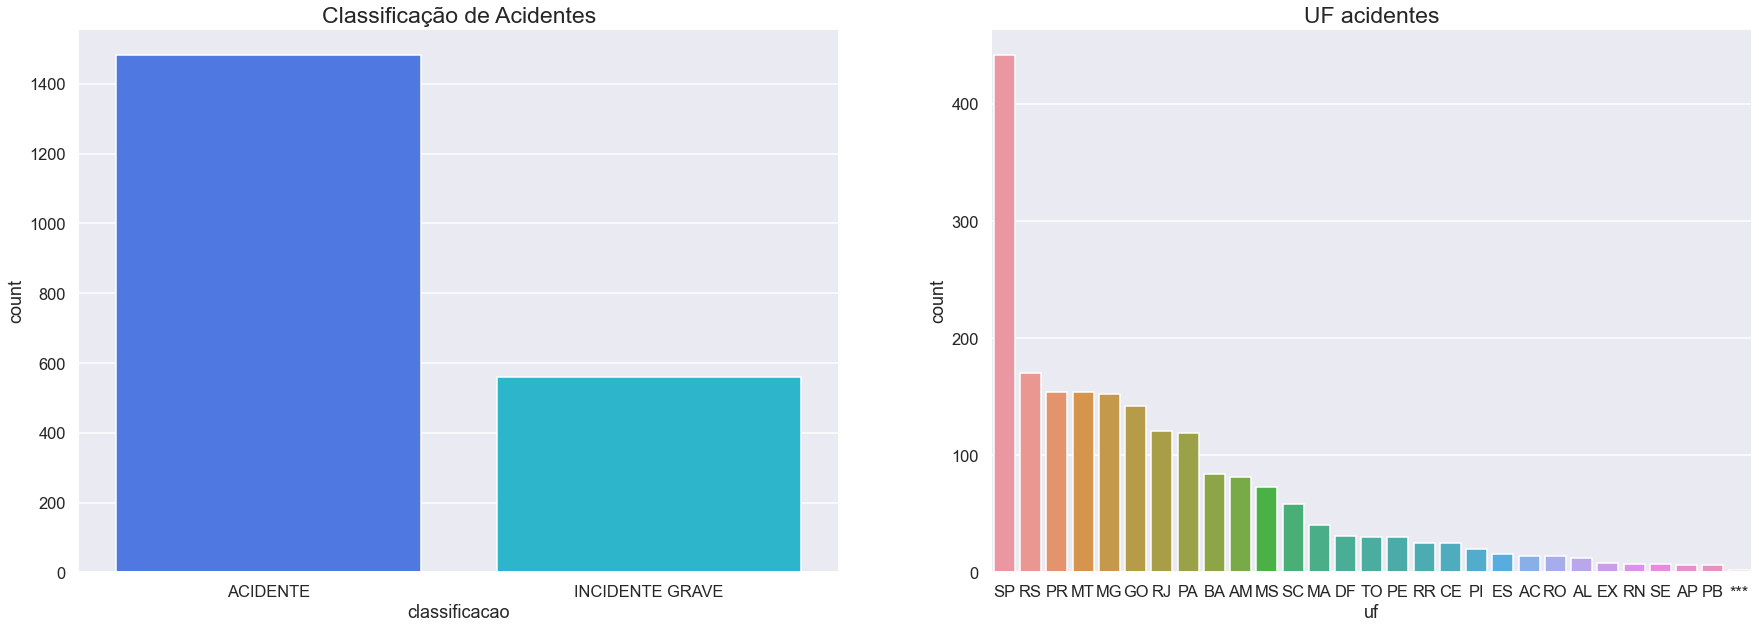

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.countplot(x = 'classificacao', 
              data = quali, 
              order = quali['classificacao'].value_counts().index,
              ax = ax[0])
ax[0].set_title('Classificação de Acidentes', fontsize = 23)
sns.countplot(x = 'uf', 
              data = quali, 
              order = quali['uf'].value_counts().index,
             ax = ax[1])
ax[1].set_title('UF acidentes', fontsize = 23);

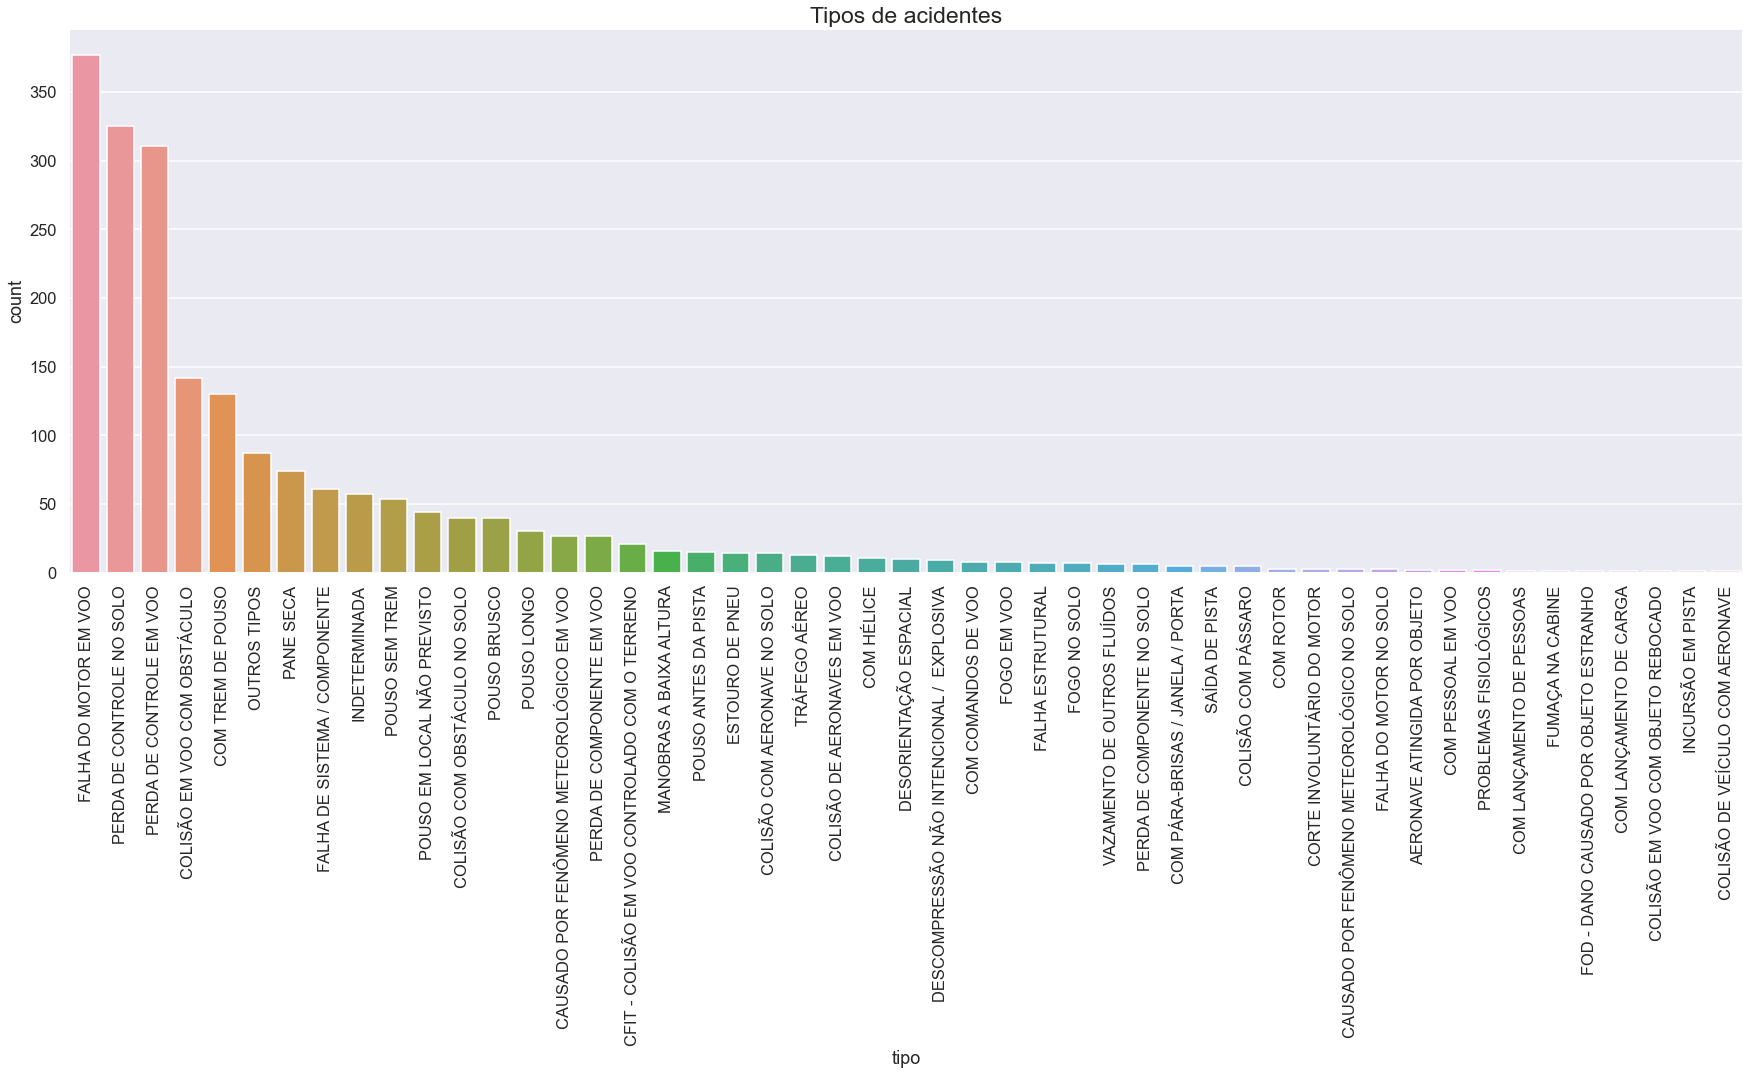

In [114]:
plt.figure(figsize = (30,10))
plt.title('Tipos de acidentes', fontsize = 23)
sns.countplot(x = 'tipo', 
              data = quali, 
              order = quali['tipo'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

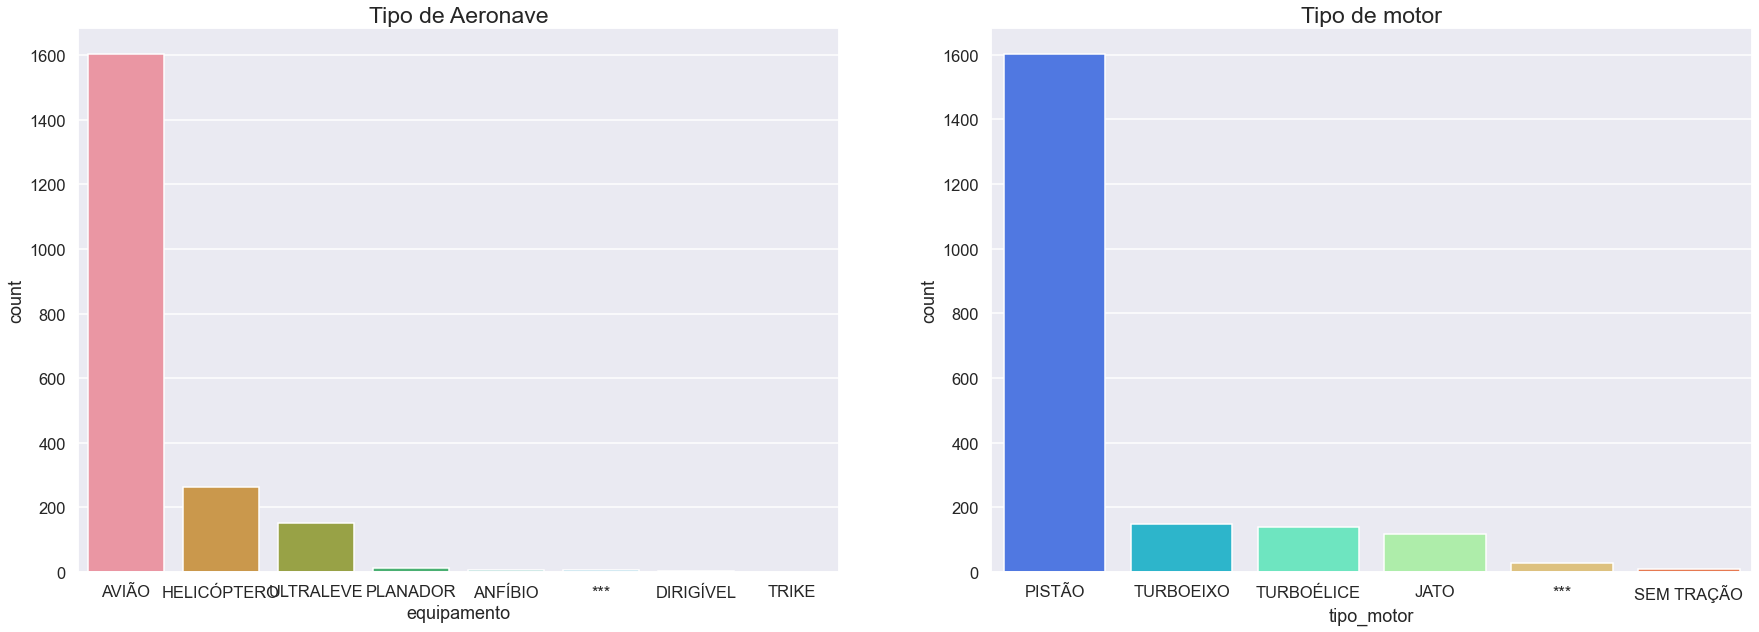

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(30,10))
sns.countplot(x = 'equipamento', 
              data = quali, 
              order = quali['equipamento'].value_counts().index,
              ax = ax[0])
ax[0].set_title('Tipo de Aeronave', fontsize = 23)
sns.countplot(x = 'tipo_motor', 
              data = quali, 
              order = quali['tipo_motor'].value_counts().index,
             ax = ax[1])
ax[1].set_title('Tipo de motor', fontsize = 23);

In [97]:
quali_2 = analise[[ 
    'tipo_operacao', 
    'nivel_dano',
    'categoria_aviacao', 
    'fase_operacao',]]

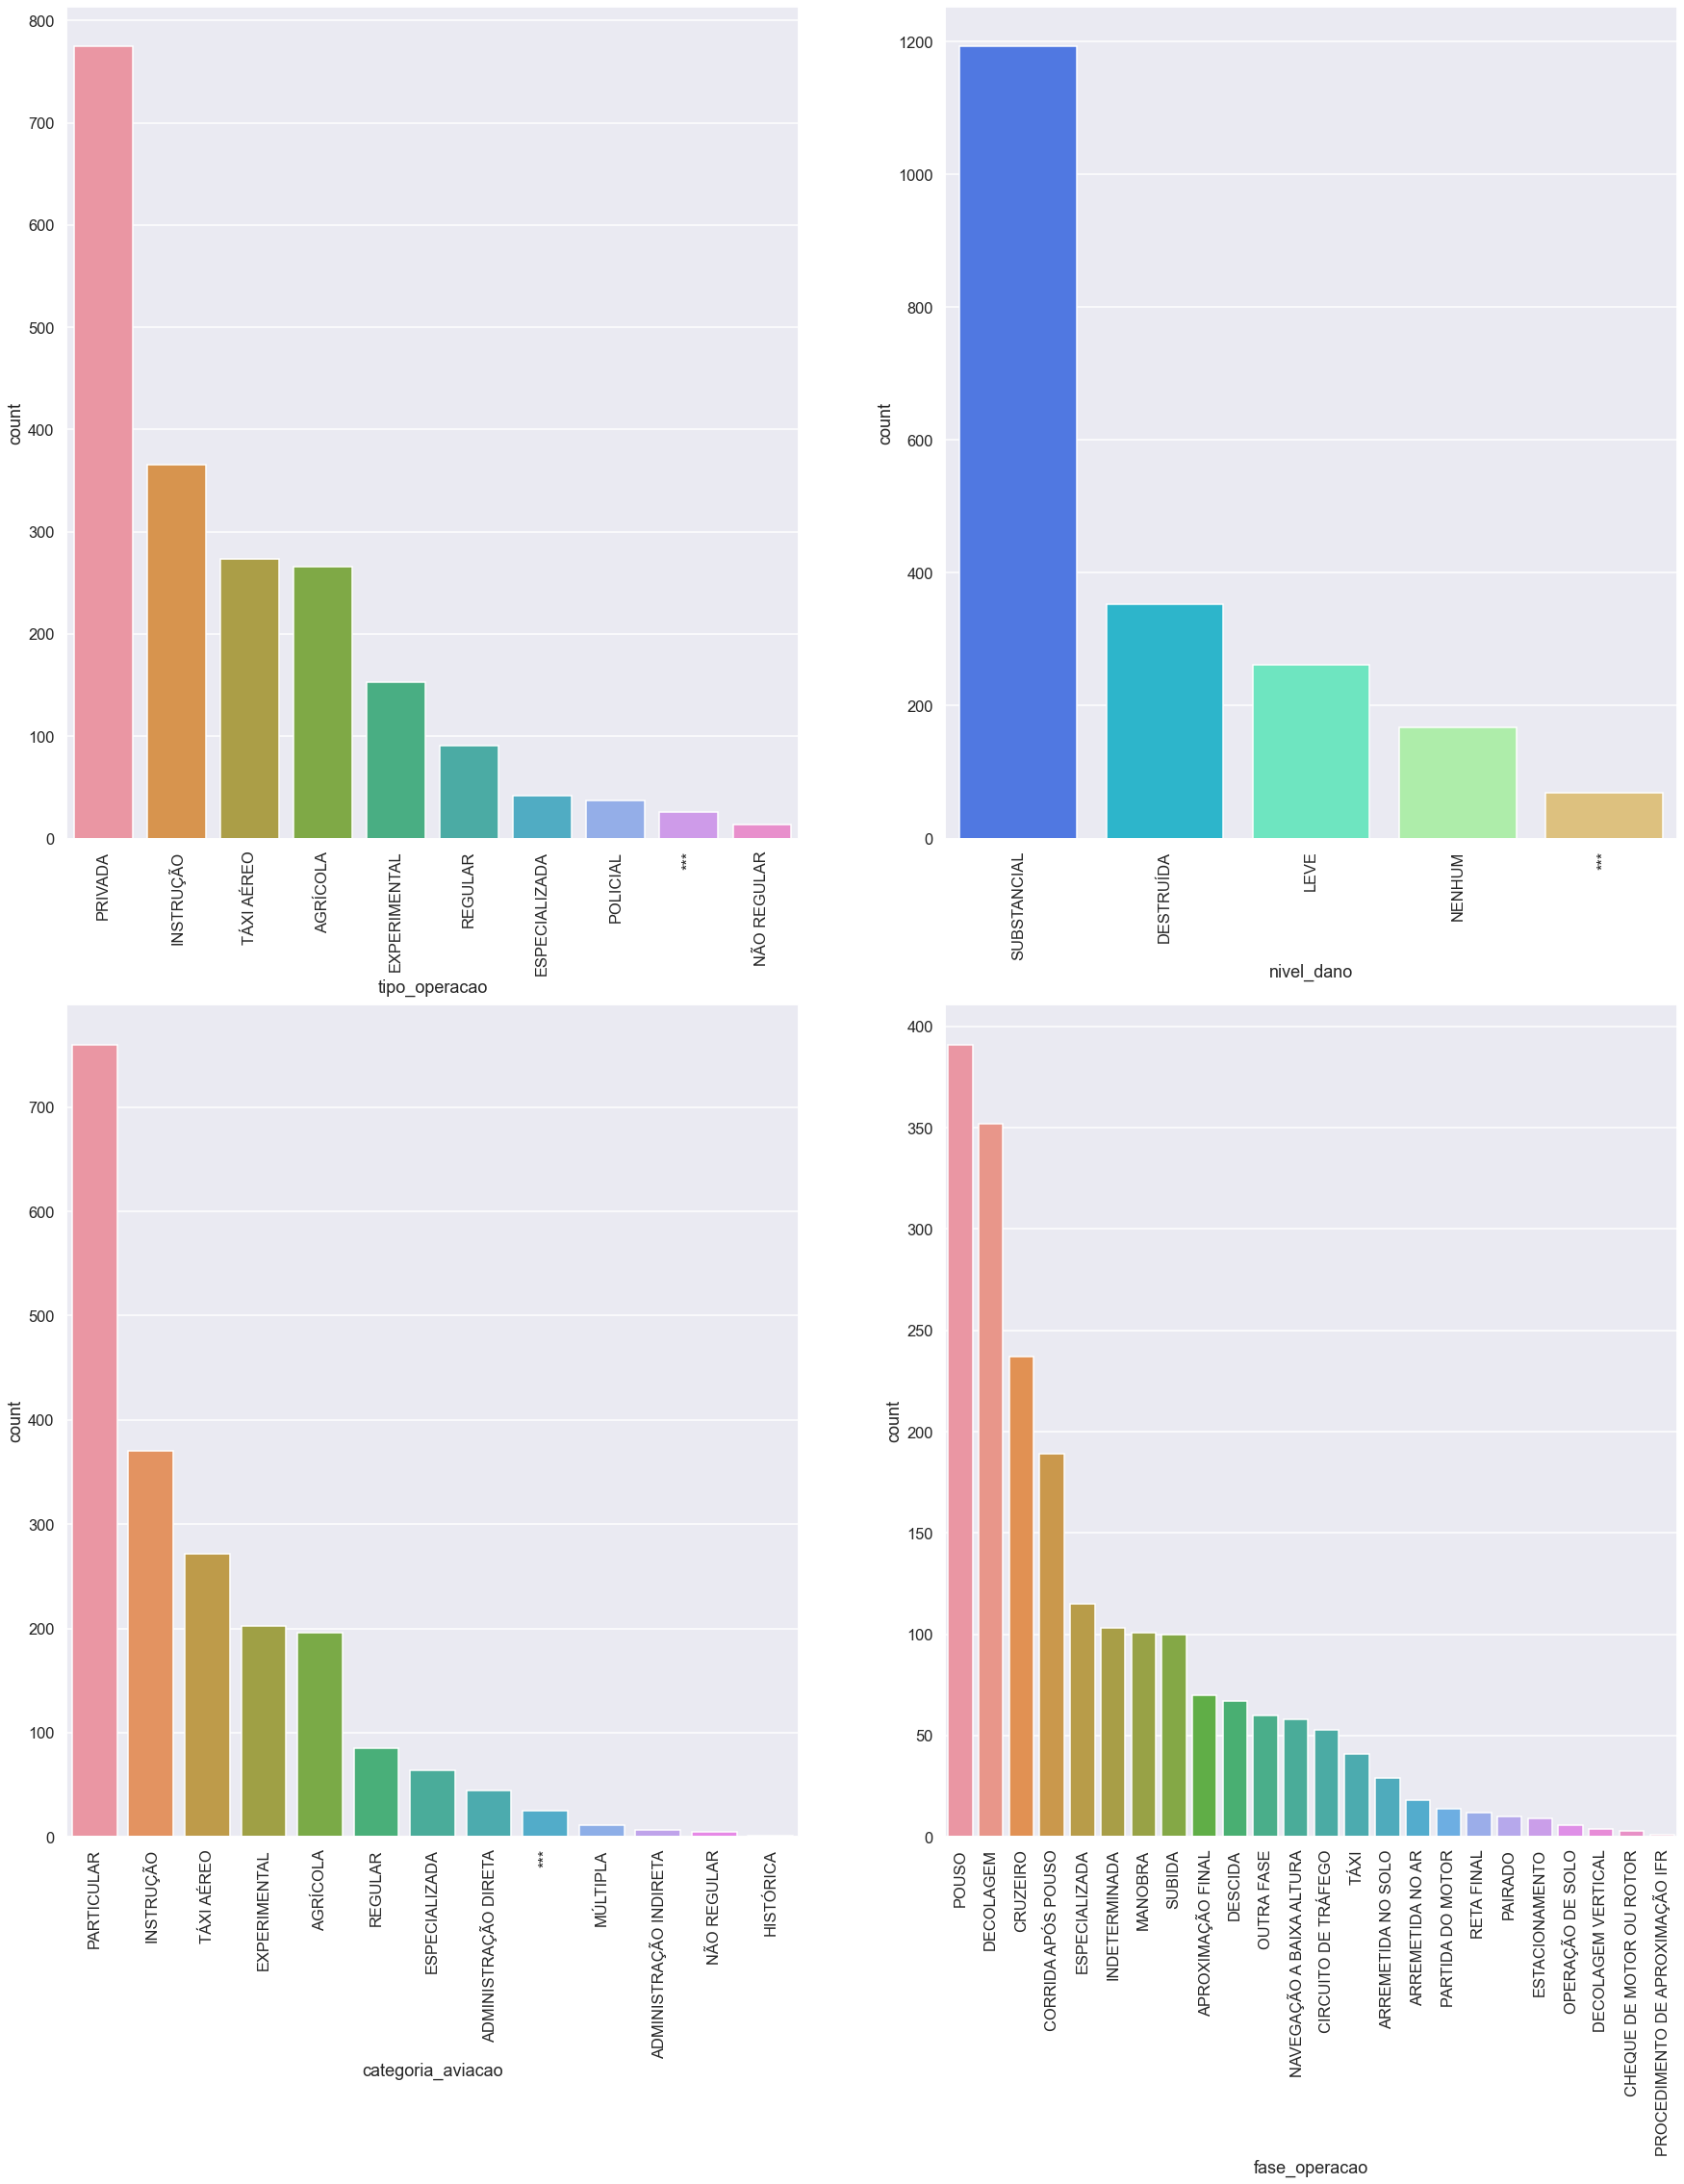

In [100]:
plt.figure(figsize=(30, 35))
for i, col in enumerate(quali_2):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=quali_2, 
                  x=col, 
                  order = quali_2[col].value_counts().index, 
                  ax=ax)
    plt.xticks(rotation=90)

**Impressões**:
- Mais de 70% das ocorrências foram acidentes.
- SP é o estado com maior quantidade de ocorrências, muito provavelmente por ser uma região populosa e movimentada.
- Os top 3 principais tipos de acidentes: falha do motor em voo, perda de controle no solo e perda de controle em voo. Totalizando 50% da quantidade de acidentes dentre os quase 50 tipos.
- Quase 80% das ocorrências são em aviões, enquanto as demais ocorrências relevantes estão divididas entre helicóptero e ultraleve.
- Muito provavelmente o tipo de motor de aviões é o pistão, se fizermos uma comparação entre as quantidades.
- Mais de 70% das aeronaves sofreram danos substanciais ou foram destruídas, o que está de acordo com a porcentagem de ocorrências de acidentes.
- Mais de 50% das ocorrências ocorrem durante o pouso ou a decolagem (subida ou descida).

##### 3.2.2. Variáveis quantitativas:

In [122]:
quanti = analise[[
    'quantidade_recomendacoes',
    'aeronaves_envolvidas',
    'saida_pista',
    'quantidade_motores',
    'peso_maximo_decolagem',
    'quantidade_assentos',
    'ano_fabricacao',
    'quantidade_fatalidades'
]]

In [131]:
quanti.describe()

,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,quantidade_motores,peso_maximo_decolagem,quantidade_assentos,ano_fabricacao,quantidade_fatalidades
count,2043.000000,2043.000000,2043.00000,2043.000000,2043.00000,2043.000000,2043.000000,2043.000000
mean,1.169359,1.018600,0.12139,1.238864,5329.94420,8.850220,1898.769946,0.557513
std,3.854059,0.173252,0.32666,0.489575,22004.50988,26.816368,410.345445,5.696881
min,0.000000,1.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,1.000000,844.00000,2.000000,1975.000000,0.000000
50%,0.000000,1.000000,0.00000,1.000000,1633.00000,4.000000,1986.000000,0.000000
75%,1.000000,1.000000,0.00000,2.000000,2155.00000,6.000000,1999.000000,0.000000
max,83.000000,4.000000,1.00000,4.000000,285990.00000,301.000000,2015.000000,199.000000


In [134]:
quanti_2 = analise[[
    'quantidade_recomendacoes',
    'aeronaves_envolvidas',
    'saida_pista',
    'quantidade_motores'
]]

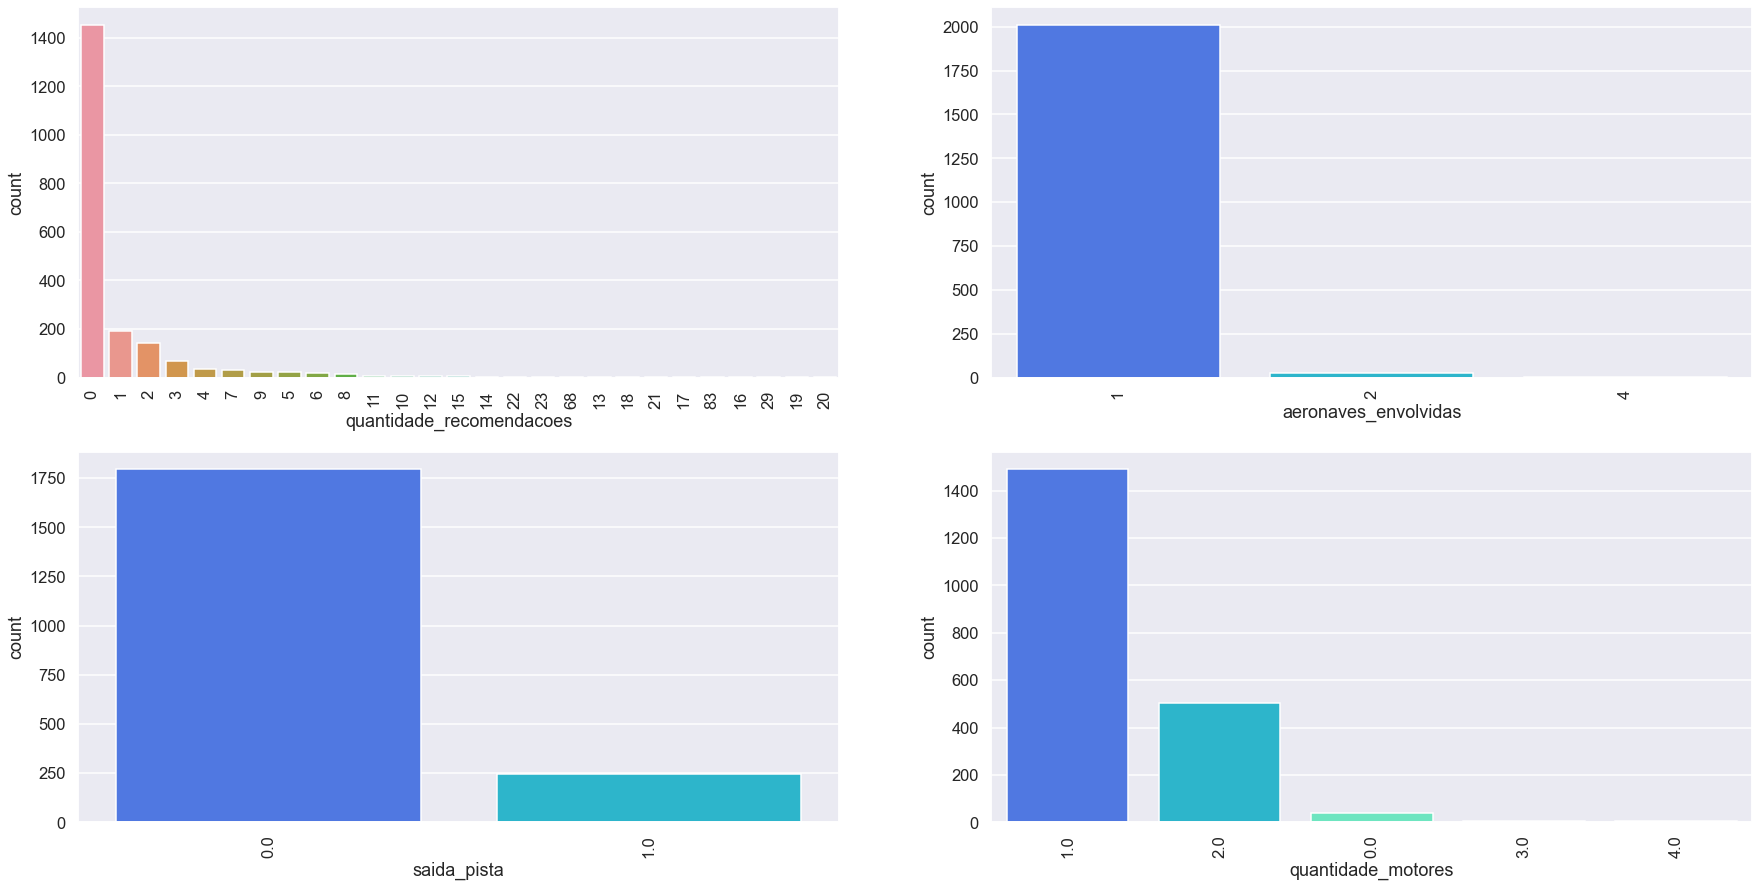

In [139]:
plt.figure(figsize=(30, 15))
for i, col in enumerate(quanti_2):
    ax = plt.subplot(2, 2, i+1)
    sns.countplot(data=quanti_2, 
                  x=col, 
                  order = quanti_2[col].value_counts().index, 
                  ax=ax)
    plt.xticks(rotation=90)

**Impressões**:
- A maioria das variavéis quantitativas são discretas e aquelas que são contínuas por hora não possibilitam uma análise distributiva.
- Interessante entender se a quantidade de recomendações emitidas podem estar relacionadas com acidentes com maior número de fatalidade.

#### 3.3. Hipóteses e questões levantadas:

A partir da análise descritiva foi possível chegar a algumas hipóteses a serem melhor exploradas, e além disso, direcionar as análises para uma parte dos dados: aviões com as investigações finalizadas. Ao final desta análise, esperamos as respostas para as seguintes hipóteses:

1 - A quantidade de recomendações emitidas pode estar relacionada com acidentes com maior número de fatalidade.
<br>2 - Apesar da baixa representatividade, as fatalidades estão relacionadas com alguma variável. Se sim, quais?
<br>3 - Existe correlação entre as ocorrências em pouso e decolagem com o clima no momento.

Com essas hipóteses norteadoras será possível iniciar uma análise mais aprofundada dos dados de forma a obter insights significativos.

#### 3.4. Estudo e validação das hipóteses:

##### HIPÓTESE 1

 _A quantidade de recomendações emitidas pode estar relacionada com acidentes com maior número de fatalidade._